## Question 6

### BlackFriday

 1. Use pandas read_csv( ) function to read the BlackFriday.csv file - You can find the csv file in Canvas. (Note: This is a dataset available in Kaggle. It is a dataset of 550000 observations about the black Friday in a retail store, it contains different kinds of variables either numerical or categorical. It contains missing values.)
 
        
2. Find the number of male and female in this dataset.

     .To do so, you must first create a separate dataset containing User ID, Gender, and Age.
     
     . Name the new dataset as customer_dataset.
     
     . Remove duplicate rows from the customer_dataset.
     
     . Use the group by method to find the number of males and females in the dataset.
     
     
3. Find the average purchase amount by individuals' gender
     . Again, you must first aggregate the purchase amount at the user level (sum) before determining it at the gender level.
     
     
4. Find the maximum purchase amount by age and city category and sort the result by the maximum purchase amount (ascending).


5. Find the minimum purchase amount by gender and marital status and sort the result by the minimum purchase amount (descending).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('BlackFriday.csv')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
customer_dataset=data[['User_ID', 'Gender','Age']].copy()
customer_dataset=customer_dataset.drop_duplicates()
customer_dataset.groupby('Gender').size()

Gender
F    1666
M    4225
dtype: int64

In [6]:
user_level = data.groupby(['User_ID','Gender'])['Purchase'].sum().reset_index()
user_level.groupby('Gender')['Purchase'].mean()

Gender
F    699054.034214
M    911963.161420
Name: Purchase, dtype: float64

In [7]:
max_purchase = data.groupby(['Age', 'City_Category'])['Purchase'].max().reset_index()
max_purchase.sort_values(by='Purchase', ascending=True)

,Age,City_Category,Purchase
0,0-17,A,23847
12,46-50,A,23912
18,55+,A,23913
14,46-50,C,23919
9,36-45,A,23949
11,36-45,C,23949
5,18-25,C,23952
1,0-17,B,23953
19,55+,B,23954
2,0-17,C,23955


In [8]:
max_purchase = data.groupby(['Gender', 'Marital_Status'])['Purchase'].max().reset_index()
max_purchase.sort_values(by='Purchase', ascending=False)

,Gender,Marital_Status,Purchase
2,M,0,23961
3,M,1,23961
1,F,1,23959
0,F,0,23955


## Question 1

In this question, you need to use a package called `emoji` in your work. To do so, run the following lines of code to install and import the package into your environment. 

In [1]:
# install the package
!python -m pip install emoji

In [2]:
# import the package
import emoji

In [3]:
emoji_list = [':slightly_smiling_face:',':pensive_face:',':disguised_face:',
              ':headphone:',':astonished_face:',':hamburger:',':grinning_face_with_smiling_eyes:',
              ':panda:',':fearful_face:',':loudly_crying_face:']

In [4]:
for item in emoji_list:
    print(item,'-->',emoji.emojize(item))

:slightly_smiling_face: --> 🙂
:pensive_face: --> 😔
:disguised_face: --> 🥸
:headphone: --> 🎧
:astonished_face: --> 😲
:hamburger: --> 🍔
:grinning_face_with_smiling_eyes: --> 😄
:panda: --> 🐼
:fearful_face: --> 😨
:loudly_crying_face: --> 😭


Your task is to perform following parts:

Part #1:
    . Use the input function to show each of the above emojis to a user and ask her to provide 5 words that describe the emoji.       The user should provide 5 single word separated by ';' to describe the emoji. For example: "Happy;Nice; smile;happy         ;cheers "

	. After receiving the user's input, you must divide the string into a list of five items, remove any possible white space around the words, and convert all of them to lowercase.For example: the above input should converted into ['happy','nice','smile','happy','cheers']

	. Convert the list to a set to eliminate any possible duplicates. For example: the above set should converted into {'happy','nice','smile','cheers'}
    
	 . Make a dictionary that associates each emoji code with a set of words provided by the user as a descriptor for that emoji. In doing so, you need to use the emoji code as the key and the identified set as the value. For example: {':slightly_smiling_face:':{'happy','nice','smile','cheers'}} Using the iterative structure, add one set to the dictionary for each emoji code.

Part #2: Use the pickle package to save the dictionary you created in the previous section to a data file.

Part #3: Load the saved data to a new variable named emoji_dict.

Part #4: Prompt the user to write a sentence containing some of the words she used to describe the emojis. Add the associated emoji to the sentence right after the word that describe the emoji and print it for the user For example: If the user inputs "I'm so happy today", your code should print "I'm so happy 🙂 today."

In [5]:
dict={}
for item in emoji_list:
    print(f"Provide 5 words for {emoji.emojize(item)}: ",end=" ")
    words=input().split(";")
    words=[word.strip().lower() for word in words]
    words=set(words)
    dict[item]=words
print(dict)

Provide 5 words for 🙂:  smile;happy ;joy; positive;happy
Provide 5 words for 😔:  sad; depressed; disappointed; sad; pensive
Provide 5 words for 🥸:  sneaky;hidden;secretive;disguised;masked
Provide 5 words for 🎧:   music;listening;audio;sound;headphones
Provide 5 words for 😲:  surprised;shocked;amazed;astonished;wow
Provide 5 words for 🍔:  food;meal;lunch;burger;sandwich
Provide 5 words for 😄:  happy;smile;friendly;joyful;positive
Provide 5 words for 🐼:  bear;panda;bamboo;zoo; panda
Provide 5 words for 😨:  scared;nervous;trembling;tense;afraid
Provide 5 words for 😭:  sad;crying;painful;sorrowful;miserable
{':slightly_smiling_face:': {'positive', 'happy', 'smile', 'joy'}, ':pensive_face:': {'pensive', 'disappointed', 'depressed', 'sad'}, ':disguised_face:': {'masked', 'disguised', 'sneaky', 'hidden', 'secretive'}, ':headphone:': {'sound', 'listening', 'headphones', 'music', 'audio'}, ':astonished_face:': {'astonished', 'wow', 'shocked', 'surprised', 'amazed'}, ':hamburger:': {'meal', 'fo

In [7]:
import pickle
with open("dict.pkl",'wb')as i:
    pickle.dump(dict,i)

In [8]:
with open("dict.pkl",'rb')as j:
    emoji_dict=pickle.load(j)

In [10]:
st=input("Write a sentence containing some of the words you used to describe the emojis: ")
for i in st.strip().split():
    for emj,itm in emoji_dict.items():
        if(i in itm):
            print(i,emoji.emojize(emj),end=" ")
            break
    else:
            print(i, end=" ")

Write a sentence containing some of the words you used to describe the emojis: Hi i am eating my burger at zoo
Hi i am eating my burger 🍔 at zoo 🐼 

## Question 2 

Your task is to create a simple encryption method. In your encryption process, you must replace each character in a sentence with the corresponding character in the encryption list. Consider the following string files in your work:

In [11]:
alp_string = 'abcdefghijklmnopqrstuvwxyz'
enc_string = 'wxyzabcdefghijklmnopqrstuv'

<ol>
    <li> Write a small python function <b>string_to_list</b> that converts a string to a list of characters.</li>
    <li> Convert alp_string to alp_list.</li>
    <li> Convert enc_string to enc_list.</li>
    <li> Build a dictionary named <b>enc_dict</b> in which each character in alp_list becomes a key and the corresponding character in enc_list becomes the value ( Here is the expcted out put that shows first two elements in the dictionary :{'a':'w', 'b':'x', ...}).<b>Tip:</b> Use zip function along with comprehension to achieve this task</li>
    <li>Write a function named <b>encryption</b> that uses enc_dict to convert an input string to its encrypted version of it and return the encrypted string.(<b>Important:</b> Since your dictionary contains only lower case characters, make sure that your function converts the input string to a lower case string at the very first step.)</li>
    <li>Write lines of code that asks the user to input a text message. Then use the encryption function that you've developed in the last step to find the encrypted version of the text message.</li>
        <p><b>Here is an example:</b></p>
        <p>Please input a message: 'this is a test message to test encyption.'</p>
        <p>Your encrypted message is: 'pdeo eo w paop iaoowca pk paop ajyulpekj.'</p>
</ol>

In [12]:
# Write your answer here (part1)
def string_to_list(string):
    l1 = list(string)
    return l1

In [13]:
# Write your answer here (part2)
alp_list = string_to_list(alp_string)
print(alp_list)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [14]:
# Write your answer here (part3)
enc_list = string_to_list(enc_string)
print(enc_list)

['w', 'x', 'y', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v']


In [15]:
# Write your answer here (part4)
enc_dict = {key:value for key,value in zip(alp_list, enc_list)}
from pprint import pprint
pprint(enc_dict)

{'a': 'w',
 'b': 'x',
 'c': 'y',
 'd': 'z',
 'e': 'a',
 'f': 'b',
 'g': 'c',
 'h': 'd',
 'i': 'e',
 'j': 'f',
 'k': 'g',
 'l': 'h',
 'm': 'i',
 'n': 'j',
 'o': 'k',
 'p': 'l',
 'q': 'm',
 'r': 'n',
 's': 'o',
 't': 'p',
 'u': 'q',
 'v': 'r',
 'w': 's',
 'x': 't',
 'y': 'u',
 'z': 'v'}


In [16]:
# Write your answer here (part5)
def encryption(string, enc_dict):
    new=""
    string = string.lower()
    for s in string:
        if s in enc_dict:
            new+=enc_dict[s]
        else:
            new+=s
    return new

In [17]:
# Write your answer here (part6)
string1 = input("Enter your String to encrypt it: ")
print("Encrypted String: ",encryption(string1, enc_dict))

Enter your String to encrypt it: this is a test message to test encryption.
Encrypted String:  pdeo eo w paop iaoowca pk paop ajynulpekj.


## Question 3
 Consider the previous example and write a decryption function.
<ol>
    <li>Build your function and test it with a simple input</li>
    <p><b>Here is a simple example:</b></p>
    <p>Input: 'pdeo eo w paop iaoowca pk paop ajyulpekj.'</p>
    <p>Output: 'this is a test message to test encyption.'</p>
    <p>&nbsp;</p>
    <li>What is the output of this message?</li>
    <p>Input: 'pdeo eo w dezzaj iaoowca; kjya zaykzaz, ck pk ywjrwo wjz lkop ej pda laan zeoyqooekj xkwnz: dks awou pda wooecjiajp eo.'</p>
</ol>    
</p>

In [18]:
# Write your answer here (part1)
def decryption(string, enc_dict):
    new = ""
    for s in string:
        if s in enc_dict.values():
            new+=next(key for key, value in enc_dict.items() if value == s)
        else:
            new+=s
    return new

In [19]:
# Write your answer here (part2)
string2 = input("Enter the encrypted string to decrypt it: ")
string2 = decryption(string2, enc_dict)
print(string2)

Enter the encrypted string to decrypt it: pdeo eo w dezzaj iaoowca; kjya zaykzaz, ck pk ywjrwo wjz lkop ej pda laan zeoyqooekj xkwnz: dks awou pda wooecjiajp eo.
this is a hidden message; once decoded, go to canvas and post in the peer discussion board: how easy the assignment is.


## Question 4

Consider the follwing line of codes:

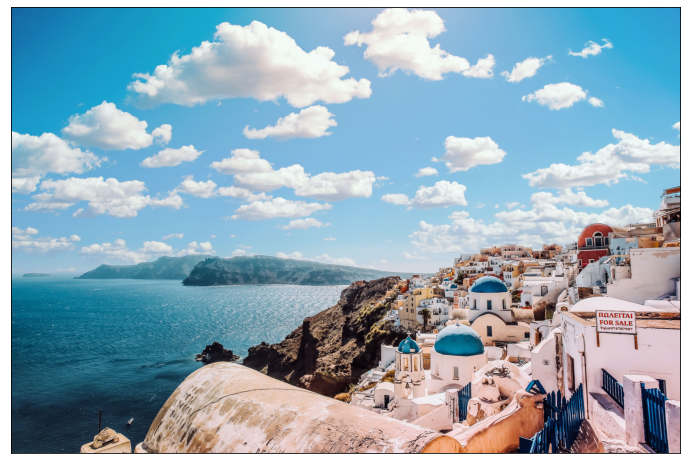

In [23]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

Greece_image = np.array(mpimg.imread('Greece.jpg'))
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(Greece_image)
ax.set(xticks=[], yticks=[])

plt.show()

In [24]:
Greece_image.shape

(3371, 5056, 3)

As you know `Greece_image` is a 3 dimensional Numpy array. With that consideration, answer the following questions:

<ol>
    <li>Copy the Greece_image to a new numpy array named New_Greece_Image. Add a value of 50 to all cells in the Blue channel of New_Greece_Image that have a value of less than 200. Visualize the new image.</li>
    <li>Make all the values in the New_Greece_Image's Green channel equal to 0. Visualize the new image. (You don't need to create a new copy. Just use the same updated array for the last step)</li>
    <li> Use Greece_image array and apply the mean aggregation function to find the average of values across different channels. Put the result in new array named New_Greece_Gray_Scale. (<b>Tip:</b> The shape of the output array (New_Greece_Gray_Scale) should be equal to (3371, 5056)). Visualize the New_Netherlands_Gray_Scale.</li>
    <li>Copy the Greece_image to a new numpy array named Greece_Image_Colorful. Modify the Greece_Image_Colorful array in such a way that you have only the Blue channel on the top half of the image and only the Green channel on the bottom half of the image. Visualize the result.</li>
 </ol>

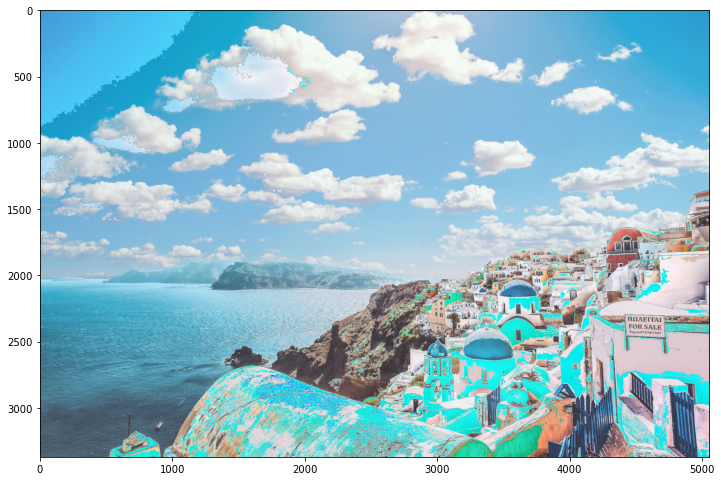

In [25]:
New_Greece_Image=Greece_image.copy()
New_Greece_Image[New_Greece_Image[:,:,2]<200]+=50
plt.figure(figsize=(12, 18))
plt.imshow(New_Greece_Image)
plt.show()

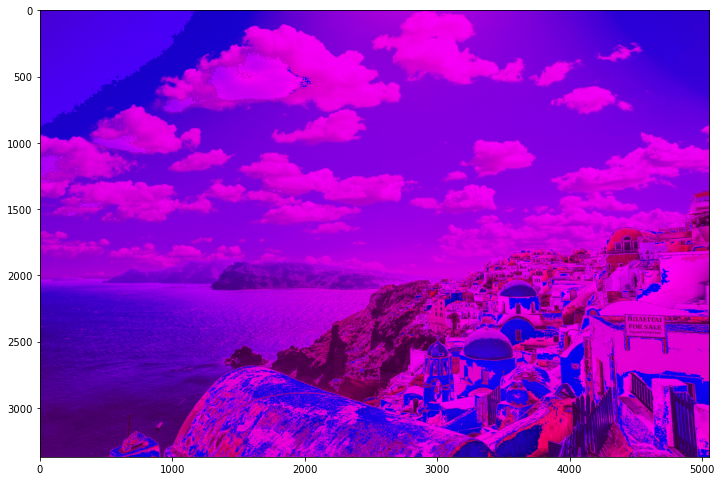

In [26]:
New_Greece_Image[:,:,1]=0
plt.figure(figsize=(12, 18))
plt.imshow(New_Greece_Image)
plt.show()

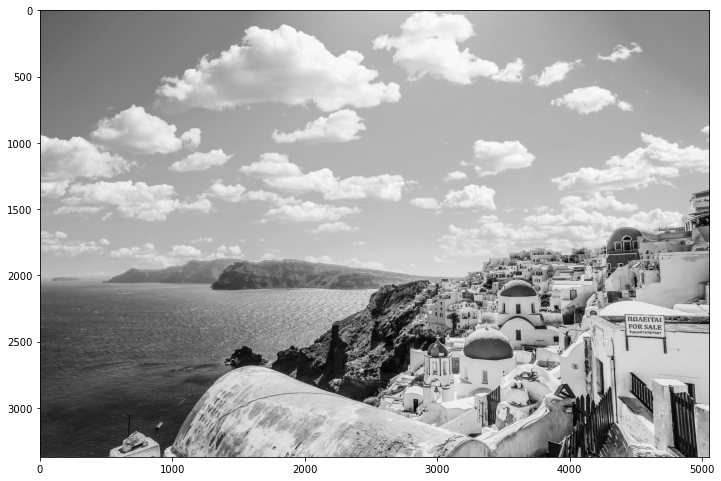

In [33]:
New_Greece_Gray_Scale = np.mean(Greece_image, axis=2)
plt.figure(figsize=(12, 18))
plt.imshow(New_Greece_Gray_Scale, cmap="gray")
plt.show()

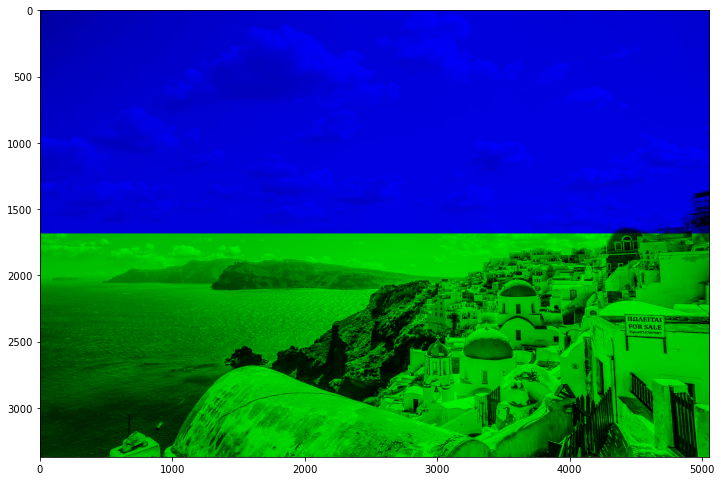

In [30]:
Greece_Image_Colorful=Greece_image.copy()
h = Greece_Image_Colorful.shape[0]//2
Greece_Image_Colorful[:h,:,:2]=0
Greece_Image_Colorful[h:,:,0]=0
Greece_Image_Colorful[h:,:,2]=0

plt.figure(figsize=(12, 18))
plt.imshow(Greece_Image_Colorful)
plt.show()

## Question 5


<ol>
<li> Create a 6x5 random matrix (matrix A) using a normal distribution with mean = -1.2 and std = .4 </li>
<li> Create another 5x3 matrix in the following format: (matrix B) 
<br>
<br>
<div>
<table style="width:200px; border:1px solid black">
<tr>
    <td style="text-align:center; border:1px solid black">0</td>
    <td style="text-align:center; border:1px solid black">-1</td>
    <td style="text-align:center; border:1px solid black">-1</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid black">3</td>
    <td style="text-align:center;border:1px solid black">4</td>
    <td style="text-align:center;border:1px solid black">1</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid black">-1</td>
    <td style="text-align:center; border:1px solid black">2</td>
    <td style="text-align:center;border:1px solid black">3</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid black">2</td>
    <td style="text-align:center; border:1px solid black">4</td>
    <td style="text-align:center; border:1px solid black">3</td>
</tr>
<tr>
    <td style="text-align:center;border:1px solid black">2</td>
    <td style="text-align:center;border:1px solid black">0</td>
    <td style="text-align:center;border:1px solid black">-2</td>
</tr>
</table>
<div></li>
<br>   
<li> Find Dot Product of matrix A and B and put it in matrix C.</li>
<li> Find the row wise sum of the matrix C.</li> 
</p>


In [39]:
A = np.random.normal(-1.2, 0.4, (6,5))
print(A)

[[-1.29679513 -1.31661857 -1.4641913  -0.9815349  -0.71579876]
 [-1.52355064 -0.64635616 -1.80445754 -1.39938335 -1.15253883]
 [-0.81672737 -2.06529021 -0.60755785 -1.08942072 -1.43724919]
 [-1.18581112 -1.81897232 -1.13513342 -1.11972664 -0.98892811]
 [-1.77024662 -1.19339248 -1.24513049 -0.67261295 -0.8303821 ]
 [-0.59876715 -0.87681612 -1.26519789 -1.67679522 -0.70405717]]


In [40]:
B = np.random.normal(-1.2, 0.4, (5,3))
print(B)

[[-1.44665354 -0.73416404 -0.65473909]
 [-0.83382065 -1.23749104 -0.94914731]
 [-1.19811374 -0.90852823 -0.86788447]
 [-2.18146558 -1.52259834 -1.25951509]
 [-1.05598366 -0.97913634 -1.71177728]]


In [41]:
C = np.dot(A,B)
print(C)

[[7.62516111 6.10697114 5.83102239]
 [9.17470917 6.81698807 6.91251025]
 [7.52577204 6.77338654 6.85469035]
 [8.07911053 6.82603195 6.59117151]
 [7.3919687  5.74487675 5.6409797 ]
 [7.51451091 5.91656698 5.63944747]]


In [42]:
l1 = np.sum(C, axis=1)
for i in range(0, l1.__len__()):
    print(f"Row {i} Sum = ", l1[i])

Row 0 Sum =  19.563154634468766
Row 1 Sum =  22.90420749295971
Row 2 Sum =  21.15384891946953
Row 3 Sum =  21.49631399698326
Row 4 Sum =  18.777825147789194
Row 5 Sum =  19.070525363224565
